<div style="text-align: center; padding: 10px; background-color: #8ef14e; border-bottom: 15px solid #008cba;border-radius: 15px 50px; ">
    <h1 style="font-size: 3em; color: #008cba;">🌐 Anemia_Prediction 🌐</h1>
    <h2 style="font-size: 2em; color: #333;">✨ Created By Abdulrahman Mohammed ✨</h2>
</div>

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;">Import Libs & Load dataset</p>

In [1]:
!git clone https://github.com/Abdo-Mohammed-10/ML1_P.git

Cloning into 'ML1_P'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 92 (delta 32), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 8.83 MiB | 13.04 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/content/ML1_P/Diabetes/diabetes_dataset.xls')

In [4]:
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [5]:
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df=df.drop(['year', 'gender', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'heart_disease', 'smoking_history'],axis=1)

In [7]:
df.columns

Index(['age', 'hypertension', 'bmi', 'hbA1c_level', 'blood_glucose_level',
       'diabetes'],
      dtype='object')

In [8]:
df

,age,hypertension,bmi,hbA1c_level,blood_glucose_level,diabetes
0,32.0,0,27.32,5.0,100,0
1,29.0,0,19.95,5.0,90,0
2,18.0,0,23.76,4.8,160,0
3,41.0,0,27.32,4.0,159,0
4,52.0,0,23.75,6.5,90,0
...,...,...,...,...,...,...
99995,33.0,0,21.21,6.5,90,0
99996,80.0,0,36.66,5.7,100,0
99997,46.0,0,36.12,6.2,158,0
99998,51.0,0,29.29,6.0,155,0


<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Preprocessing </p>

In [9]:
df.describe()

,age,hypertension,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,95.690000,9.000000,300.000000,1.000000


In [10]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


In [11]:
df.isnull().sum()

,0
age,0
hypertension,0
bmi,0
hbA1c_level,0
blood_glucose_level,0
diabetes,0


In [12]:
duplicate_count=df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 13328


In [13]:
df = df.drop_duplicates() # REMOVE DUBLICATED VALUES
df.duplicated().sum()

np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86672 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  86672 non-null  float64
 1   hypertension         86672 non-null  int64  
 2   bmi                  86672 non-null  float64
 3   hbA1c_level          86672 non-null  float64
 4   blood_glucose_level  86672 non-null  int64  
 5   diabetes             86672 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


In [15]:
df.shape

(86672, 6)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Visualization </p>

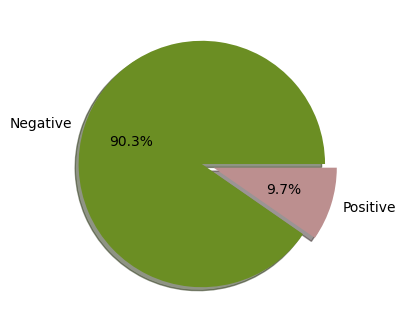

In [16]:
fig = plt.figure(figsize =(15, 4))

plt.pie(df.groupby('diabetes').size(), labels =['Negative', 'Positive'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True,colors=['olivedrab', 'rosybrown'])

plt.show()

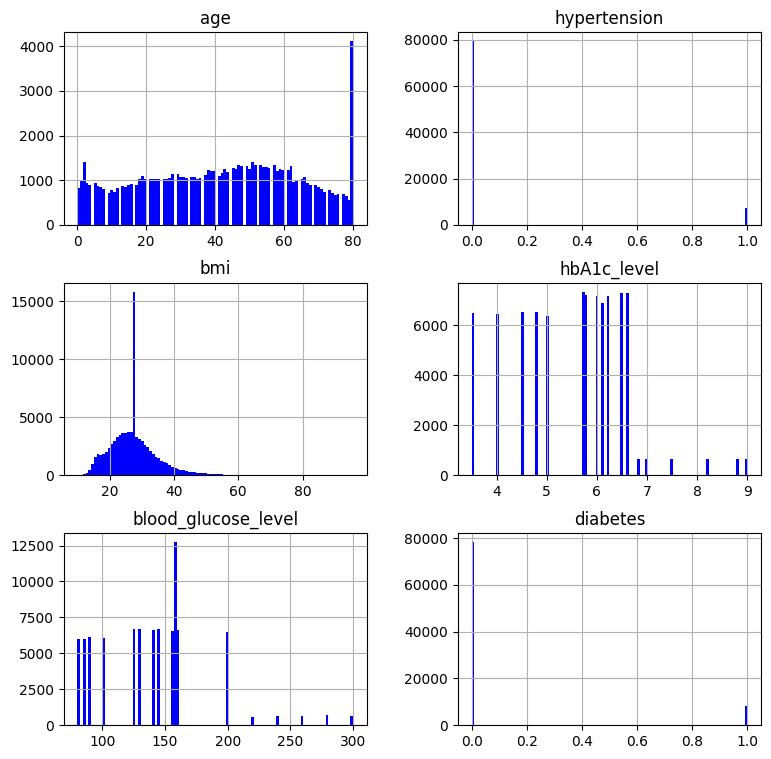

In [17]:
df.hist(bins=100, figsize=(9,9), color='b')
plt.show()

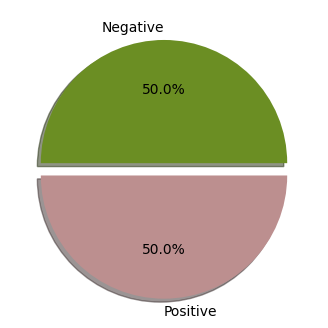

In [18]:
#oversampling standard not smote
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop('diabetes', axis=1), df['diabetes'])
#update df
df = pd.concat([X_resampled, y_resampled], axis=1)
# plot after oversampling
fig = plt.figure(figsize =(15, 4))
plt.pie(y_resampled.value_counts(), labels =['Negative', 'Positive'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True,colors=['olivedrab', 'rosybrown'])
plt.show()

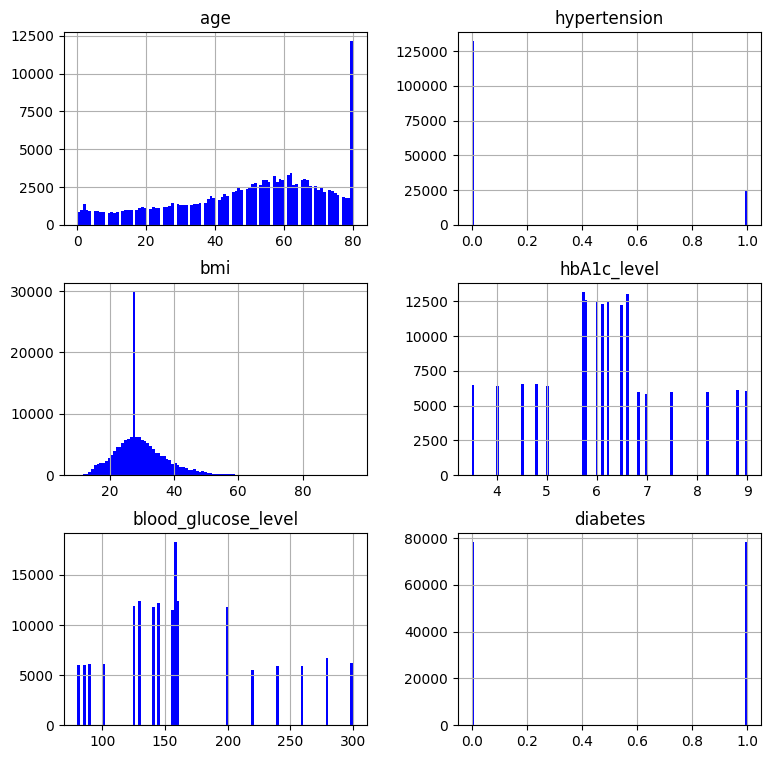

In [19]:
df.hist(bins=100, figsize=(9,9), color='b')
plt.show()

<Axes: >

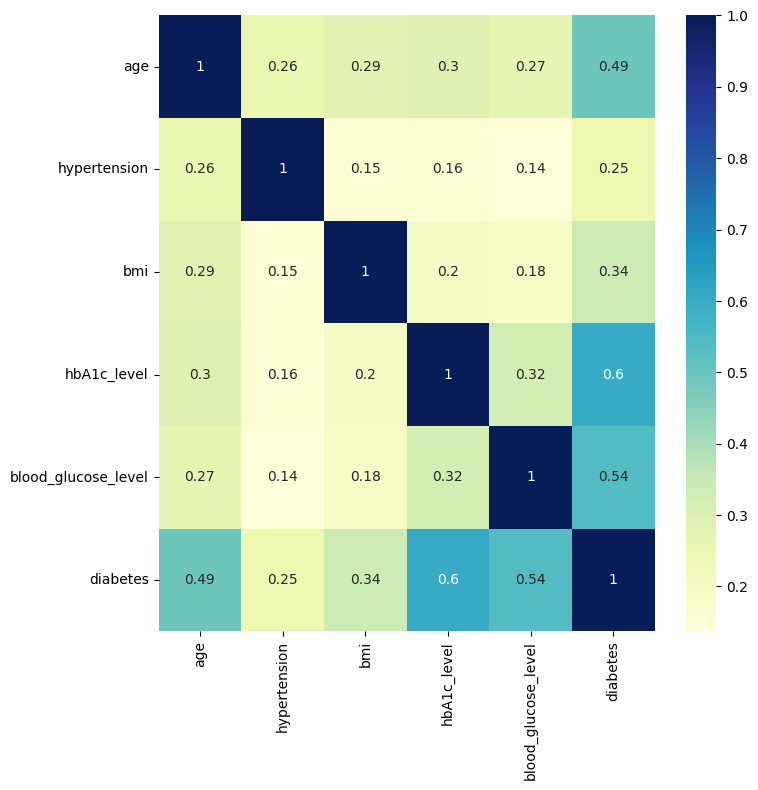

In [20]:
correlation=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation ,annot=True ,cbar=True ,cmap='YlGnBu')

In [24]:
df.shape

(156610, 6)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Seprating Shapes</p>

In [34]:
X_resampled.shape

(156610, 5)

In [35]:
y_resampled.shape

(156610,)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Standardization </p>

In [36]:
scaler= StandardScaler()
X_resampled=scaler.fit_transform(X_resampled)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> ML Algorithms </p>

### Logistic Regression

In [66]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
print('accuracy score on the training data : ',model1.score(X_train, Y_train))
print('accuracy score on the testing data : ',model1.score(X_test, Y_test))

accuracy score on the training data :  0.8799086903773705
accuracy score on the testing data :  0.8814251963476151


### RandomForestClassifier

In [67]:
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)
print('accuracy score on the training data : ',model2.score(X_train, Y_train))
print('accuracy score on the testing data : ',model2.score(X_test, Y_test))

accuracy score on the training data :  0.9978369835898091
accuracy score on the testing data :  0.9863035566055808


### DecisionTreeClassifier

In [68]:
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train, Y_train)
print('accuracy score on the training data : ',model3.score(X_train, Y_train))
print('accuracy score on the testing data : ',model3.score(X_test, Y_test))

accuracy score on the training data :  0.9978369835898091
accuracy score on the testing data :  0.9815784432667135


### KNeighborsClassifier

In [69]:
model4 =KNeighborsClassifier()
model4.fit(X_train, Y_train)
print('accuracy score on the training data : ',model4.score(X_train, Y_train))
print('accuracy score on the testing data : ',model4.score(X_test, Y_test))

accuracy score on the training data :  0.9671476917182811
accuracy score on the testing data :  0.9553668348125918


<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> System Evaluation </p>

In [44]:
input_data=(32.0,1,27.32,1.0,100)
input_data_arr=np.asarray(input_data)
input_data_arr_reshape=input_data_arr.reshape(1,-1)


input_data_arr_scaler=scaler.transform(input_data_arr_reshape)
print(input_data_arr_scaler)


predict_input=model2.predict(input_data_arr_scaler)
print(predict_input)


if predict_input==1:
    print("Positive +")
else:
        print("Negative -")


[[-0.8370496   2.31011638 -0.27411131 -4.03132492 -1.11320997]]
[0]
Negative -


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving Model

In [45]:
import joblib

joblib.dump(model2, 'diabetes.pkl')
print("Model saved!")

joblib.dump(scaler, 'scalerdiabetes.pkl')
print("Scaler saved!")

loaded_model = joblib.load('diabetes.pkl')

new_predictions = loaded_model.predict(X_test)
print(f"Restored Model Accuracy: {accuracy_score(Y_test, new_predictions):.2f}")

Model saved!
Scaler saved!
Restored Model Accuracy: 0.99


In [46]:
loaded_model = joblib.load('diabetes.pkl')

In [53]:
loaded_model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [54]:
Y_test[12]

np.int64(0)

In [55]:
X_test[12]

array([ 0.7292255 , -0.43287862, -0.27411131,  0.3389816 , -1.37633703])

In [57]:
loaded_model.predict(X_test[12].reshape(1, -1))

array([0])